In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 연봉데이터 로딩, 전처리, EDA, Feature Engineering
# modeling, 성능 검증, 하이퍼파라미터 튜닝

# 기본모델: DecisionTree  - 성능 기준
# 배깅, 부스팅, 랜덤배깅 모델 튜닝

## 분석목적: 학력, 교육연수, 혼인상태, 직업정보가 있는 연봉데이터셋을 이용해 연봉 예측하기
## 연봉이 5만달러 이상인지 아닌지

* age: 나이
* workclass: 고용형태
* education: 학력
* education-num: 교육연수
* marital-status: 혼인상태
* occupation: 직업
* relationship: 가족관계
* race: 인종
* sex: 성별
* capital-gain: 자산증가
* capital-loss: 자산감소
* hours-per-week: 주당 노동 시간
* native-country: 본국
* class: 연봉구분 - target(분석대상)

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/salary2.csv")
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [4]:
data.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# 1. 결측값 처리

In [5]:
data.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [6]:
data.isna().mean() * 100

age               0.000000
workclass         5.730724
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
class             0.000000
dtype: float64

In [7]:
data['workclass'].unique()

array([' Private', ' Local-gov', nan, ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [8]:
# 나이가 20세 미만
# 미혼모, 미혼부
# 별거중, 멀리 떨어져 있음
data[data['workclass'] == ' Never-worked']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
8785,17,Never-worked,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<=50K
11607,20,Never-worked,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<=50K
13898,18,Never-worked,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K
21642,18,Never-worked,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
27126,23,Never-worked,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
31053,17,Never-worked,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
36618,18,Never-worked,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
39513,20,Never-worked,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
48585,30,Never-worked,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
48595,18,Never-worked,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K


In [9]:
data.loc[data['workclass'] == ' Never-worked', 'occupation'] = 'part-timer'

In [10]:
data[data['workclass'] == ' Without-pay']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
2957,19,Without-pay,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,10,United-States,<=50K
3177,74,Without-pay,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,20,United-States,<=50K
6466,51,Without-pay,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
8903,64,Without-pay,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,60,United-States,>50K
10647,50,Without-pay,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Own-child,White,Female,0,1887,40,United-States,>50K
13836,39,Without-pay,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
14034,27,Without-pay,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Female,0,0,40,United-States,<=50K
18182,65,Without-pay,7th-8th,4,Widowed,Farming-fishing,Unmarried,White,Female,0,0,50,United-States,<=50K
25538,19,Without-pay,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,20,United-States,<=50K
31814,21,Without-pay,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K


In [11]:
data[data['workclass'].isna() == True]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [12]:
data.loc[data['workclass'].isna() == True, 'workclass'] = 'part-timer'

In [13]:
data['occupation'] = data['occupation'].fillna('part-timer')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [15]:
data.isna().sum()

age                 0
workclass           0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    857
class               0
dtype: int64

In [16]:
data = data.dropna()

In [17]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47985 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47985 non-null  int64 
 1   workclass       47985 non-null  object
 2   education       47985 non-null  object
 3   education-num   47985 non-null  int64 
 4   marital-status  47985 non-null  object
 5   occupation      47985 non-null  object
 6   relationship    47985 non-null  object
 7   race            47985 non-null  object
 8   sex             47985 non-null  object
 9   capital-gain    47985 non-null  int64 
 10  capital-loss    47985 non-null  int64 
 11  hours-per-week  47985 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           47985 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.5+ MB


카테고리 변수들의 자료에 공백이 있어 공백을 제거

In [19]:
cols = list(data.columns)
cols

['age',
 'workclass',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'class']

In [20]:
data['workclass'].apply(lambda x: x.strip())

0             Private
1             Private
2           Local-gov
3             Private
4          part-timer
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 47985, dtype: object

In [21]:
data['workclass'].dtype

dtype('O')

In [22]:
data['age'].dtype

dtype('int64')

In [23]:
for col in cols:
    if data[col].dtype == 'O':
        data[col] = data[col].apply(lambda x: x.strip())
    

In [24]:
for col in cols:
    if data[col].dtype == 'O':
        print(col, data[col].unique())

workclass ['Private' 'Local-gov' 'part-timer' 'Self-emp-not-inc' 'Federal-gov'
 'State-gov' 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool']
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'part-timer'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race ['Black' 'White' 'Other' 'Amer-Indian-Eskimo' 'Asian-Pac-Islander']
sex ['Male' 'Female']
native-country ['United-States' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Ph

# 이상치 탐지

In [25]:
search_outlier = data.describe()

In [26]:
search_outlier.loc['75%', :]

age               48.0
education-num     12.0
capital-gain       0.0
capital-loss       0.0
hours-per-week    45.0
Name: 75%, dtype: float64

In [27]:
search_outlier.loc['75%', :] + (1.5 * (search_outlier.loc['75%', :] - search_outlier.loc['25%', :]))

age               78.0
education-num     16.5
capital-gain       0.0
capital-loss       0.0
hours-per-week    52.5
dtype: float64

In [28]:
search_outlier

,age,education-num,capital-gain,capital-loss,hours-per-week
count,47985.000000,47985.000000,47985.000000,47985.000000,47985.000000
mean,38.641284,10.067229,1067.032093,87.370553,40.411483
std,13.729622,2.560534,7373.256663,402.681462,12.391073
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


* capital-gain	capital-loss 히스토그램 그리기
* hours-per-week 이상값을 가진 데이터 찾아보기

In [29]:
data[data['capital-gain'] > 0]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
10,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
14,48,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K
25,45,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,90,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48796,66,Federal-gov,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,3471,0,40,United-States,<=50K
48799,57,Local-gov,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
48819,38,Private,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
48829,65,Self-emp-not-inc,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K


In [30]:
len(data[data['capital-gain'] > 0]) / len(data) * 100

8.254662915494425

In [31]:
len(data[data['capital-loss'] > 0])

2239

In [32]:
len(data[data['capital-loss'] > 0]) / len(data) * 100

4.666041471293112

<Axes: xlabel='capital-gain', ylabel='Count'>

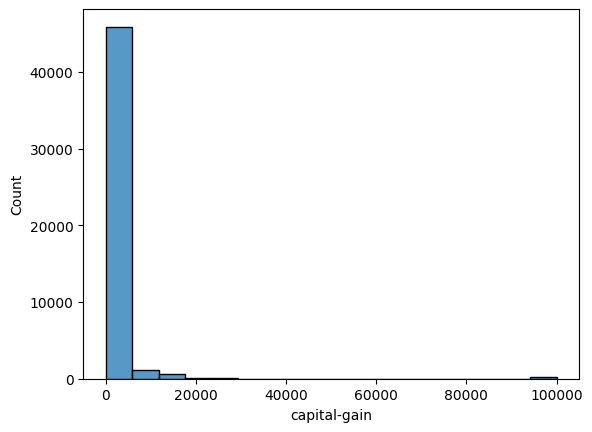

In [33]:
sns.histplot(data['capital-gain'])

<Axes: xlabel='capital-loss', ylabel='Count'>

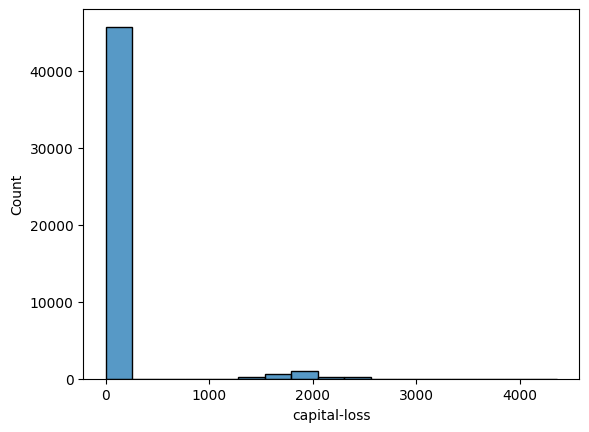

In [34]:
sns.histplot(data['capital-loss'])

In [35]:
data['capital-gain_yes'] = data['capital-gain'].apply(lambda x: 1 if x > 0 else 0)

In [36]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,capital-gain_yes
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
4,18,part-timer,Some-college,10,Never-married,part-timer,Own-child,White,Female,0,0,30,United-States,<=50K,0


In [37]:
data['capital-loss_yes'] = data['capital-loss'].apply(lambda x: 1 if x > 0 else 0)

In [38]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,capital-gain_yes,capital-loss_yes
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,0
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,0
4,18,part-timer,Some-college,10,Never-married,part-timer,Own-child,White,Female,0,0,30,United-States,<=50K,0,0


In [39]:
data[['class', 'capital-gain_yes']].groupby('capital-gain_yes').value_counts()

capital-gain_yes  class
0                 <=50K    34996
                  >50K      9028
1                 >50K      2439
                  <=50K     1522
Name: count, dtype: int64

In [40]:
data[['class', 'capital-loss_yes']].groupby('capital-loss_yes').value_counts()

capital-loss_yes  class
0                 <=50K    35399
                  >50K     10347
1                 >50K      1120
                  <=50K     1119
Name: count, dtype: int64

In [41]:
data['capital-gain'].describe()

count    47985.000000
mean      1067.032093
std       7373.256663
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [42]:
data[data['capital-gain'] > 1067.032093]['class'].value_counts()

class
>50K     2439
<=50K    1405
Name: count, dtype: int64

In [43]:
data[data['capital-gain'] < 1067.032093]['class'].value_counts()

class
<=50K    35113
>50K      9028
Name: count, dtype: int64

자산이 증가한 경우 연봉이 5만달러 이상일 가능성이 높은 편이다.

In [44]:
data['capital-loss'].describe()

count    47985.000000
mean        87.370553
std        402.681462
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

In [45]:
data[data['capital-loss'] > 87.370553]['class'].value_counts()

class
>50K     1120
<=50K    1119
Name: count, dtype: int64

In [46]:
data[data['capital-loss'] < 87.370553]['class'].value_counts()

class
<=50K    35399
>50K     10347
Name: count, dtype: int64

In [47]:
data[data['hours-per-week'] > 52.5]['class'].value_counts()

class
<=50K    3002
>50K     2109
Name: count, dtype: int64

In [48]:
data[data['hours-per-week'] < 52.5]['class'].value_counts()

class
<=50K    33516
>50K      9358
Name: count, dtype: int64

<Axes: xlabel='hours-per-week', ylabel='Count'>

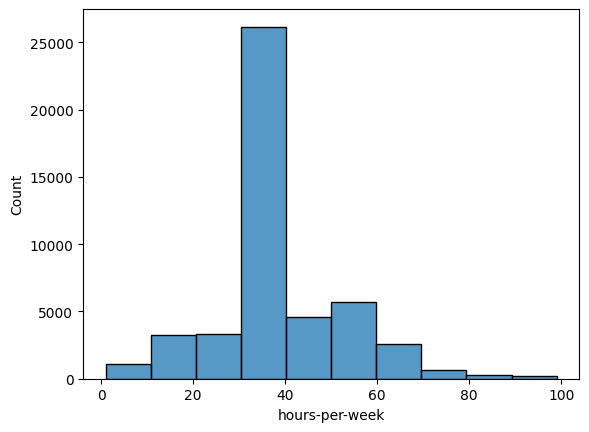

In [49]:
sns.histplot(data['hours-per-week'], bins=10)

In [50]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class',
       'capital-gain_yes', 'capital-loss_yes'],
      dtype='object')

<Axes: xlabel='age', ylabel='Count'>

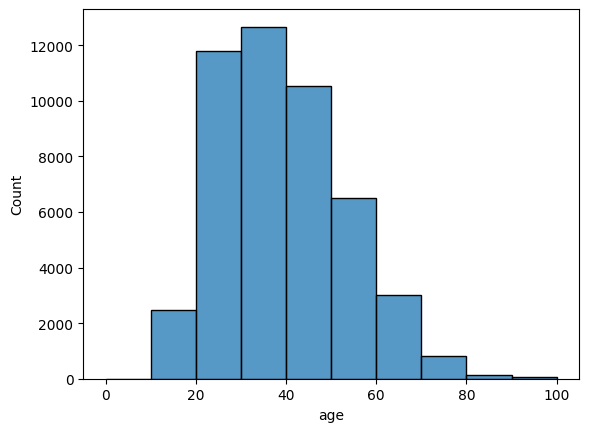

In [51]:
sns.histplot(data['age'], bins=[0,10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

In [52]:
bins = [0,10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['under10s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
data['age'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

In [53]:
data['age']

0        20s
1        30s
2        20s
3        40s
4        10s
        ... 
48837    20s
48838    40s
48839    50s
48840    20s
48841    50s
Name: age, Length: 47985, dtype: category
Categories (10, object): ['under10s' < '10s' < '20s' < '30s' ... '60s' < '70s' < '80s' < '90s']

In [54]:
age_class = data[['age','class']].groupby('age').describe()
age_class

C:\Users\5-29\AppData\Local\Temp\ipykernel_14096\3389183381.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_class = data[['age','class']].groupby('age').describe()


class                     
          count unique    top   freq
age                                 
under10s      0      0    NaN    NaN
10s        2490      2  <=50K   2487
20s       11802      2  <=50K  11073
30s       12666      2  <=50K   9271
40s       10524      2  <=50K   6613
50s        6513      2  <=50K   4048
60s        2999      2  <=50K   2210
70s         810      2  <=50K    664
80s         127      2  <=50K    111
90s          54      2  <=50K     41

In [55]:
age_class.columns

MultiIndex([('class',  'count'),
            ('class', 'unique'),
            ('class',    'top'),
            ('class',   'freq')],
           )

In [56]:
age_class_ratio = 100 - (age_class[('class',   'freq')] / age_class[('class',  'count')] * 100)
age_class_ratio

age
under10s          NaN
10s          0.120482
20s          6.176919
30s         26.804042
40s         37.162676
50s         37.847382
60s          26.30877
70s         18.024691
80s         12.598425
90s         24.074074
dtype: object

In [57]:
age_class_ratio['under10s'] = 0

In [58]:
age_class_ratio

age
under10s            0
10s          0.120482
20s          6.176919
30s         26.804042
40s         37.162676
50s         37.847382
60s          26.30877
70s         18.024691
80s         12.598425
90s         24.074074
dtype: object

In [59]:
age_class_idx = list(age_class_ratio.index)

In [60]:
data['over50byage'] = data['age'].apply(lambda x: age_class_ratio[x])

In [61]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,capital-gain_yes,capital-loss_yes,over50byage
0,20s,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,0,6.176919
1,30s,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,0,26.804042
2,20s,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,0,6.176919
3,40s,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,0,37.162676
4,10s,part-timer,Some-college,10,Never-married,part-timer,Own-child,White,Female,0,0,30,United-States,<=50K,0,0,0.120482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,20s,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,0,6.176919
48838,40s,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0,0,37.162676
48839,50s,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,0,37.847382
48840,20s,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,0,6.176919


In [62]:
data.groupby('age')['class'].describe()

C:\Users\5-29\AppData\Local\Temp\ipykernel_14096\32632337.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('age')['class'].describe()


,count,unique,top,freq
age,,,,
under10s,0,0,NaN,NaN
10s,2490,2,<=50K,2487
20s,11802,2,<=50K,11073
30s,12666,2,<=50K,9271
40s,10524,2,<=50K,6613
50s,6513,2,<=50K,4048
60s,2999,2,<=50K,2210
70s,810,2,<=50K,664
80s,127,2,<=50K,111


In [63]:
print(type(age_class))

<class 'pandas.core.frame.DataFrame'>


In [64]:
age_class.describe()

class                    
       count unique    top  freq
count     10     10      9     9
unique    10      2      1     9
top        0      2  <=50K  2487
freq       1      9      9     1

In [65]:
data['workclass'].value_counts()

workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
part-timer           2753
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [66]:
class_ratio_by_workclass = data.groupby('workclass')['class'].describe()
class_ratio_by_workclass

,count,unique,top,freq
workclass,,,,
Federal-gov,1406,2,<=50K,857
Local-gov,3100,2,<=50K,2185
Never-worked,10,1,<=50K,10
Private,33307,2,<=50K,26056
Self-emp-inc,1646,2,>50K,912
Self-emp-not-inc,3796,2,<=50K,2737
State-gov,1946,2,<=50K,1426
Without-pay,21,2,<=50K,19
part-timer,2753,2,<=50K,2494


In [67]:
class_ratio_by_workclass.columns

Index(['count', 'unique', 'top', 'freq'], dtype='object')

In [68]:
over50byworkclass = 100 - (class_ratio_by_workclass['freq'] / class_ratio_by_workclass['count'] * 100)

In [69]:
over50byworkclass['Self-emp-inc'] = 100 - over50byworkclass['Self-emp-inc']

In [70]:
over50byworkclass

workclass
Federal-gov         39.046942
Local-gov           29.516129
Never-worked              0.0
Private             21.770198
Self-emp-inc        55.407047
Self-emp-not-inc    27.897787
State-gov            26.72148
Without-pay           9.52381
part-timer           9.407919
dtype: object

In [71]:
data['over50byworkclass'] = data['workclass'].apply(lambda x: over50byworkclass[x])

In [72]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,capital-gain_yes,capital-loss_yes,over50byage,over50byworkclass
0,20s,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,0,6.176919,21.770198
1,30s,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,0,26.804042,21.770198
2,20s,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,0,6.176919,29.516129
3,40s,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,0,37.162676,21.770198
4,10s,part-timer,Some-college,10,Never-married,part-timer,Own-child,White,Female,0,0,30,United-States,<=50K,0,0,0.120482,9.407919


In [73]:
data['education'].value_counts()

education
HS-grad         15586
Some-college    10723
Bachelors        7815
Masters          2579
Assoc-voc        2038
11th             1800
Assoc-acdm       1579
10th             1372
7th-8th           931
Prof-school       808
9th               745
12th              635
Doctorate         562
5th-6th           490
1st-4th           240
Preschool          82
Name: count, dtype: int64

In [74]:
data.groupby('education')['class'].describe()

,count,unique,top,freq
education,,,,
10th,1372,2,<=50K,1286
11th,1800,2,<=50K,1709
12th,635,2,<=50K,590
1st-4th,240,2,<=50K,232
5th-6th,490,2,<=50K,466
7th-8th,931,2,<=50K,872
9th,745,2,<=50K,706
Assoc-acdm,1579,2,<=50K,1172
Assoc-voc,2038,2,<=50K,1521


In [75]:
data[data['education'] == 'Doctorate']['education-num'].value_counts()

education-num
16    562
Name: count, dtype: int64

In [76]:
data[data['education-num'].isin([14, 15, 16])]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,capital-gain_yes,capital-loss_yes,over50byage,over50byworkclass
7,60s,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,1,0,26.308770,27.897787
15,40s,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K,0,0,37.162676,21.770198
40,60s,Private,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K,0,0,26.308770,21.770198
62,20s,Private,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K,0,0,6.176919,21.770198
89,40s,part-timer,Masters,14,Married-civ-spouse,part-timer,Wife,White,Female,7688,0,10,United-States,>50K,1,0,37.162676,9.407919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48820,70s,part-timer,Doctorate,16,Married-civ-spouse,part-timer,Husband,White,Male,0,0,10,United-States,>50K,0,0,18.024691,9.407919
48825,30s,Private,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K,0,0,26.804042,21.770198
48829,60s,Self-emp-not-inc,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K,1,0,26.308770,27.897787
48834,30s,Private,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K,0,0,26.804042,21.770198


In [77]:
ratiobyedu_num = data.groupby('education-num')['class'].describe()
ratiobyedu_num

,count,unique,top,freq
education-num,,,,
1,82,2,<=50K,81
2,240,2,<=50K,232
3,490,2,<=50K,466
4,931,2,<=50K,872
5,745,2,<=50K,706
6,1372,2,<=50K,1286
7,1800,2,<=50K,1709
8,635,2,<=50K,590
9,15586,2,<=50K,13105


In [78]:
over50byedu_num = 100 - (ratiobyedu_num['freq'] / ratiobyedu_num['count'] * 100)
over50byedu_num

education-num
1      1.219512
2      3.333333
3      4.897959
4      6.337272
5      5.234899
6      6.268222
7      5.055556
8      7.086614
9     15.918132
10    18.996549
11    25.368008
12    25.775807
13     41.40755
14     44.86235
15    25.371287
16    26.868327
dtype: object

In [79]:
over50byedu_num[16] = 100 - over50byedu_num[16]

In [80]:
over50byedu_num

education-num
1      1.219512
2      3.333333
3      4.897959
4      6.337272
5      5.234899
6      6.268222
7      5.055556
8      7.086614
9     15.918132
10    18.996549
11    25.368008
12    25.775807
13     41.40755
14     44.86235
15    25.371287
16    73.131673
dtype: object

In [81]:
data['over50byedu_num'] = data['education-num'].apply(lambda x: over50byedu_num[x])

In [82]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,capital-gain_yes,capital-loss_yes,over50byage,over50byworkclass,over50byedu_num
0,20s,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,0,6.176919,21.770198,5.055556
1,30s,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,0,26.804042,21.770198,15.918132
2,20s,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,0,6.176919,29.516129,25.775807
3,40s,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,0,37.162676,21.770198,18.996549
4,10s,part-timer,Some-college,10,Never-married,part-timer,Own-child,White,Female,0,0,30,United-States,<=50K,0,0,0.120482,9.407919,18.996549


In [83]:
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       21971
Never-married            15816
Divorced                  6561
Separated                 1507
Widowed                   1498
Married-spouse-absent      595
Married-AF-spouse           37
Name: count, dtype: int64

In [84]:
data.groupby('marital-status')['class'].value_counts(sort=False)

marital-status         class
Divorced               <=50K     5897
                       >50K       664
Married-AF-spouse      <=50K       23
                       >50K        14
Married-civ-spouse     <=50K    12174
                       >50K      9797
Married-spouse-absent  <=50K      540
                       >50K        55
Never-married          <=50K    15105
                       >50K       711
Separated              <=50K     1408
                       >50K        99
Widowed                <=50K     1371
                       >50K       127
Name: count, dtype: int64

일반인과 결혼한 상태가 5만달러 이상의 소득일 가능성이 높은 편

In [85]:
data['occupation'].value_counts()

occupation
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
part-timer           2763
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: count, dtype: int64

* Craft-repair: 수공예 수리
* Prof-specialty: 전문직
* Exec-managerial: 경영진 관리
* Adm-clerical: 행정 사무
* Sales: 영업
* Other-service: 기타 서비스
* Machine-op-inspct: 기계 조작 및 검사
* part-timer: 파트 타이머
* Transport-moving: 수송 이동
* Handlers-cleaners: 핸들러 및 청소부
* Farming-fishing: 농업 및 어업
* Tech-support: 기술 지원
* Protective-serv: 보호 서비스
* Priv-house-serv: 가사 서비스
* Armed-Forces: 군대

In [86]:
data.groupby('occupation')['class'].value_counts(sort=False)

occupation         class
Adm-clerical       <=50K    4784
                   >50K      756
Armed-Forces       <=50K      10
                   >50K        4
Craft-repair       <=50K    4665
                   >50K     1355
Exec-managerial    <=50K    3117
                   >50K     2867
Farming-fishing    <=50K    1308
                   >50K      172
Handlers-cleaners  <=50K    1911
                   >50K      135
Machine-op-inspct  <=50K    2605
                   >50K      365
Other-service      <=50K    4612
                   >50K      196
Priv-house-serv    <=50K     229
                   >50K        3
Prof-specialty     <=50K    3304
                   >50K     2704
Protective-serv    <=50K     669
                   >50K      307
Sales              <=50K    3953
                   >50K     1455
Tech-support       <=50K    1009
                   >50K      411
Transport-moving   <=50K    1838
                   >50K      478
part-timer         <=50K    2504
                  

In [87]:
data[(data['workclass'] == "Self-emp-inc")][['occupation', 'class']].value_counts()

occupation         class
Exec-managerial    >50K     375
Sales              >50K     226
Exec-managerial    <=50K    225
Prof-specialty     >50K     185
Sales              <=50K    181
Craft-repair       <=50K    104
Farming-fishing    <=50K     59
Prof-specialty     <=50K     57
Craft-repair       >50K      54
Other-service      <=50K     32
Adm-clerical       <=50K     31
Transport-moving   <=50K     24
Farming-fishing    >50K      23
Adm-clerical       >50K      13
Transport-moving   >50K      13
Machine-op-inspct  <=50K     12
Other-service      >50K      10
Tech-support       >50K       8
Handlers-cleaners  <=50K      5
Protective-serv    <=50K      3
Machine-op-inspct  >50K       2
Protective-serv    >50K       2
Handlers-cleaners  >50K       1
Tech-support       <=50K      1
Name: count, dtype: int64

In [88]:
data.groupby('occupation')['class'].describe()

,count,unique,top,freq
occupation,,,,
Adm-clerical,5540,2,<=50K,4784
Armed-Forces,14,2,<=50K,10
Craft-repair,6020,2,<=50K,4665
Exec-managerial,5984,2,<=50K,3117
Farming-fishing,1480,2,<=50K,1308
Handlers-cleaners,2046,2,<=50K,1911
Machine-op-inspct,2970,2,<=50K,2605
Other-service,4808,2,<=50K,4612
Priv-house-serv,232,2,<=50K,229


In [89]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class',
       'capital-gain_yes', 'capital-loss_yes', 'over50byage',
       'over50byworkclass', 'over50byedu_num'],
      dtype='object')

In [90]:
data['relationship'].value_counts()

relationship
Husband           19371
Not-in-family     12353
Own-child          7491
Unmarried          5041
Wife               2277
Other-relative     1452
Name: count, dtype: int64

In [91]:
data.groupby('relationship')['class'].value_counts(sort=False)

relationship    class
Husband         <=50K    10689
                >50K      8682
Not-in-family   <=50K    11102
                >50K      1251
Other-relative  <=50K     1401
                >50K        51
Own-child       <=50K     7384
                >50K       107
Unmarried       <=50K     4736
                >50K       305
Wife            <=50K     1206
                >50K      1071
Name: count, dtype: int64

In [92]:
data['race'].value_counts()

race
White                 41189
Black                  4553
Asian-Pac-Islander     1391
Amer-Indian-Eskimo      470
Other                   382
Name: count, dtype: int64

In [93]:
data.groupby('race')['class'].value_counts(sort=False)

race                class
Amer-Indian-Eskimo  <=50K      415
                    >50K        55
Asian-Pac-Islander  <=50K     1016
                    >50K       375
Black               <=50K     4006
                    >50K       547
Other               <=50K      335
                    >50K        47
White               <=50K    30746
                    >50K     10443
Name: count, dtype: int64

In [94]:
data['sex'].value_counts()

sex
Male      32041
Female    15944
Name: count, dtype: int64

In [95]:
data.groupby('sex')['class'].value_counts(sort=False)

sex     class
Female  <=50K    14203
        >50K      1741
Male    <=50K    22315
        >50K      9726
Name: count, dtype: int64

In [96]:
data['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

판다스에서 데이터 프레임 축약을 없애는 법

In [97]:
# pd.set_option('display.max_rows', None)

In [98]:
data.groupby('native-country')['class'].value_counts(sort=False)

native-country  class
Cambodia        <=50K       19
                >50K         9
Canada          <=50K      119
                >50K        63
China           <=50K       86
                         ...  
United-States   >50K     10694
Vietnam         <=50K       79
                >50K         7
Yugoslavia      <=50K       15
                >50K         8
Name: count, Length: 81, dtype: int64

In [99]:
over50_by_country = data.groupby('native-country')['class'].describe()
over50_by_country

,count,unique,top,freq
native-country,,,,
Cambodia,28,2,<=50K,19
Canada,182,2,<=50K,119
China,122,2,<=50K,86
Columbia,85,2,<=50K,81
Cuba,138,2,<=50K,104
Dominican-Republic,103,2,<=50K,98
Ecuador,45,2,<=50K,39
El-Salvador,155,2,<=50K,144
England,127,2,<=50K,80


In [100]:
over50_ratio_country = 100 - (over50_by_country['freq'] / over50_by_country['count'] * 100)
over50_ratio_country

native-country
Cambodia                      32.142857
Canada                        34.615385
China                         29.508197
Columbia                       4.705882
Cuba                          24.637681
Dominican-Republic             4.854369
Ecuador                       13.333333
El-Salvador                    7.096774
England                       37.007874
France                        42.105263
Germany                        28.15534
Greece                        36.734694
Guatemala                      3.409091
Haiti                              12.0
Holand-Netherlands                  0.0
Honduras                           10.0
Hong                          26.666667
Hungary                       31.578947
India                         41.059603
Iran                          37.288136
Ireland                        29.72973
Italy                         32.380952
Jamaica                       14.150943
Japan                         34.782609
Laos                     

In [101]:
data['over50bycountry'] = data['native-country'].apply(lambda x: over50_ratio_country[x])

In [102]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,capital-gain_yes,capital-loss_yes,over50byage,over50byworkclass,over50byedu_num,over50bycountry
0,20s,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,0,6.176919,21.770198,5.055556,24.3977
1,30s,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,0,26.804042,21.770198,15.918132,24.3977
2,20s,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,0,6.176919,29.516129,25.775807,24.3977
3,40s,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,0,37.162676,21.770198,18.996549,24.3977
4,10s,part-timer,Some-college,10,Never-married,part-timer,Own-child,White,Female,0,0,30,United-States,<=50K,0,0,0.120482,9.407919,18.996549,24.3977


Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class',
       'capital-gain_yes', 'capital-loss_yes', 'over50byage',
       'over50byworkclass', 'over50byedu_num', 'over50bycountry'],
      dtype='object')

In [106]:
data = data.drop(['education', 'capital-gain','capital-loss'], axis=1)

In [108]:
data.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country',
       'class', 'capital-gain_yes', 'capital-loss_yes', 'over50byage',
       'over50byworkclass', 'over50byedu_num', 'over50bycountry'],
      dtype='object')

In [109]:
data = pd.get_dummies(data, columns=['age', 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'],  drop_first=True)
data.head()

,education-num,hours-per-week,class,capital-gain_yes,capital-loss_yes,over50byage,over50byworkclass,over50byedu_num,over50bycountry,age_10s,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,40,<=50K,0,0,6.176919,21.770198,5.055556,24.3977,False,...,False,False,False,False,False,False,False,True,False,False
1,9,50,<=50K,0,0,26.804042,21.770198,15.918132,24.3977,False,...,False,False,False,False,False,False,False,True,False,False
2,12,40,>50K,0,0,6.176919,29.516129,25.775807,24.3977,False,...,False,False,False,False,False,False,False,True,False,False
3,10,40,>50K,1,0,37.162676,21.770198,18.996549,24.3977,False,...,False,False,False,False,False,False,False,True,False,False
4,10,30,<=50K,0,0,0.120482,9.407919,18.996549,24.3977,True,...,False,False,False,False,False,False,False,True,False,False


In [111]:
data['class'] = data['class'].apply(lambda x: 1 if x == '>50K' else 0)
data.head()

,education-num,hours-per-week,class,capital-gain_yes,capital-loss_yes,over50byage,over50byworkclass,over50byedu_num,over50bycountry,age_10s,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,40,0,0,0,6.176919,21.770198,5.055556,24.3977,False,...,False,False,False,False,False,False,False,True,False,False
1,9,50,0,0,0,26.804042,21.770198,15.918132,24.3977,False,...,False,False,False,False,False,False,False,True,False,False
2,12,40,1,0,0,6.176919,29.516129,25.775807,24.3977,False,...,False,False,False,False,False,False,False,True,False,False
3,10,40,1,1,0,37.162676,21.770198,18.996549,24.3977,False,...,False,False,False,False,False,False,False,True,False,False
4,10,30,0,0,0,0.120482,9.407919,18.996549,24.3977,True,...,False,False,False,False,False,False,False,True,False,False


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47985 entries, 0 to 48841
Data columns (total 96 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   education-num                              47985 non-null  int64   
 1   hours-per-week                             47985 non-null  int64   
 2   class                                      47985 non-null  int64   
 3   capital-gain_yes                           47985 non-null  int64   
 4   capital-loss_yes                           47985 non-null  int64   
 5   over50byage                                47985 non-null  category
 6   over50byworkclass                          47985 non-null  float64 
 7   over50byedu_num                            47985 non-null  float64 
 8   over50bycountry                            47985 non-null  float64 
 9   age_10s                                    47985 non-null  bool    
 10  age_20s        

In [114]:
data['over50byage'] = data['over50byage'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47985 entries, 0 to 48841
Data columns (total 96 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   education-num                              47985 non-null  int64  
 1   hours-per-week                             47985 non-null  int64  
 2   class                                      47985 non-null  int64  
 3   capital-gain_yes                           47985 non-null  int64  
 4   capital-loss_yes                           47985 non-null  int64  
 5   over50byage                                47985 non-null  int32  
 6   over50byworkclass                          47985 non-null  float64
 7   over50byedu_num                            47985 non-null  float64
 8   over50bycountry                            47985 non-null  float64
 9   age_10s                                    47985 non-null  bool   
 10  age_20s                    

In [115]:
X = data.drop('class', axis=1)
y = data['class']

In [116]:
from sklearn.model_selection import train_test_split

In [122]:
y.value_counts()

class
0    36518
1    11467
Name: count, dtype: int64

In [125]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, stratify=y, random_state=7)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=7)

In [118]:
len(X_train)

28791

In [119]:
len(X_valid)

9597

In [120]:
len(X_test)

9597

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [126]:
dtc = DecisionTreeClassifier(max_depth = 3, random_state= 7)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

0.8210899239345629
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7304
           1       0.68      0.47      0.56      2293

    accuracy                           0.82      9597
   macro avg       0.77      0.70      0.72      9597
weighted avg       0.81      0.82      0.81      9597



In [127]:
for i in range(1, 30):
    dtc = DecisionTreeClassifier(max_depth = i, random_state= 7)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_valid)
    print(i, accuracy_score(y_valid, pred))
    print(i, classification_report(y_valid, pred))

1 0.7610711680733563
1               precision    recall  f1-score   support

           0       0.76      1.00      0.86      7304
           1       0.00      0.00      0.00      2293

    accuracy                           0.76      9597
   macro avg       0.38      0.50      0.43      9597
weighted avg       0.58      0.76      0.66      9597

2 0.8191101385849745
2               precision    recall  f1-score   support

           0       0.84      0.94      0.89      7304
           1       0.69      0.44      0.54      2293

    accuracy                           0.82      9597
   macro avg       0.77      0.69      0.71      9597
weighted avg       0.81      0.82      0.80      9597

3 0.8210899239345629
3               precision    recall  f1-score   support

           0       0.85      0.93      0.89      7304
           1       0.68      0.47      0.56      2293

    accuracy                           0.82      9597
   macro avg       0.77      0.70      0.72      9597
weigh

C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4 0.8273418776701053
4               precision    recall  f1-score   support

           0       0.86      0.92      0.89      7304
           1       0.68      0.53      0.60      2293

    accuracy                           0.83      9597
   macro avg       0.77      0.73      0.74      9597
weighted avg       0.82      0.83      0.82      9597

5 0.8300510576221736
5               precision    recall  f1-score   support

           0       0.86      0.93      0.89      7304
           1       0.69      0.52      0.59      2293

    accuracy                           0.83      9597
   macro avg       0.78      0.72      0.74      9597
weighted avg       0.82      0.83      0.82      9597

6 0.8303636553089507
6               precision    recall  f1-score   support

           0       0.88      0.90      0.89      7304
           1       0.66      0.61      0.63      2293

    accuracy                           0.83      9597
   macro avg       0.77      0.75      0.76      9597
weigh

28 0.8133791809940606
28               precision    recall  f1-score   support

           0       0.87      0.89      0.88      7304
           1       0.62      0.56      0.59      2293

    accuracy                           0.81      9597
   macro avg       0.74      0.73      0.73      9597
weighted avg       0.81      0.81      0.81      9597

29 0.8121287902469522
29               precision    recall  f1-score   support

           0       0.86      0.89      0.88      7304
           1       0.62      0.55      0.58      2293

    accuracy                           0.81      9597
   macro avg       0.74      0.72      0.73      9597
weighted avg       0.81      0.81      0.81      9597



In [128]:
dtc = DecisionTreeClassifier(max_depth = 6, random_state= 7)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

0.8303636553089507
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7304
           1       0.66      0.61      0.63      2293

    accuracy                           0.83      9597
   macro avg       0.77      0.75      0.76      9597
weighted avg       0.83      0.83      0.83      9597



In [129]:
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8322392414296135
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7303
           1       0.66      0.60      0.63      2294

    accuracy                           0.83      9597
   macro avg       0.77      0.75      0.76      9597
weighted avg       0.83      0.83      0.83      9597

